Find notebook here:

https://www.kaggle.com/jsongunsw/spotify-datasets/data

If you want to understand PCA:

https://www.youtube.com/watch?v=_UVHneBUBW0

Highly suggest watching the PCA video as PCA is something that we may want to do for our own Spotify Questions.

The use of PCA is that it makes an ob that has for example 10 quant variables that define it, into something that only has 3 (or whatever < n dimesions you want). If you wanted to make it only 3 dimensional it would take the 10 dimensional graph of the points and rank the dimensions in which most of the variation is to be had. Then it assigns a value to each ob for how much influence it had on that variation for that dimension. Ultimately things that are close to each other will cluster together.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline

import os


In [2]:
data = pd.read_csv("featuresdf.csv")

In [3]:
data

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


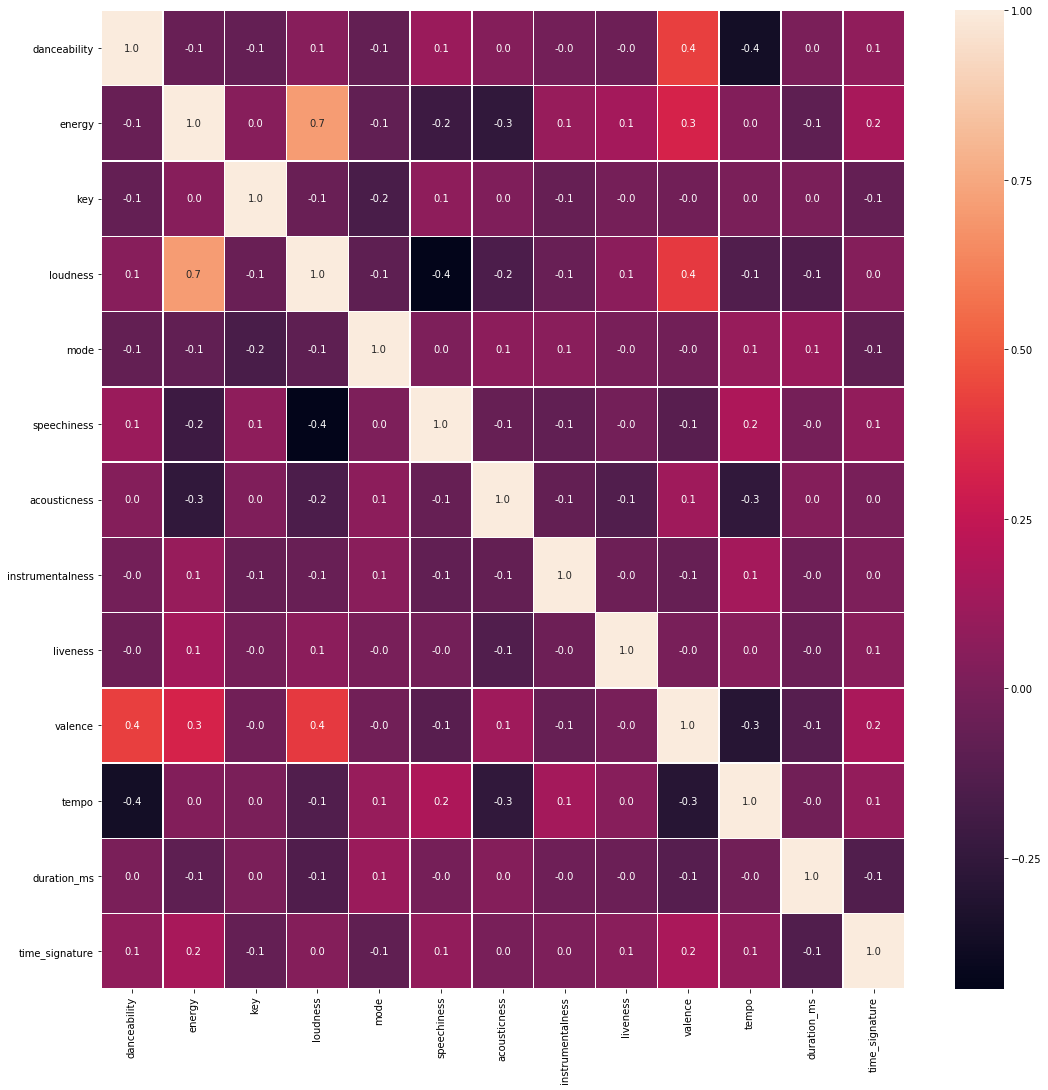

In [4]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [5]:
specific = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = data["artists"] + " - " + data["name"]
text2 = text1.values

In [6]:
X = data[specific].values
y = data["danceability"].values

In [7]:
X

array([[ 6.52000e-01,  9.31000e-02,  9.59770e+01,  9.31000e-01,
        -3.18300e+00,  8.02000e-02,  5.81000e-01,  8.25000e-01,
         0.00000e+00],
       [ 8.15000e-01,  9.24000e-02,  8.89310e+01,  8.13000e-01,
        -4.32800e+00,  1.20000e-01,  2.29000e-01,  6.94000e-01,
         0.00000e+00],
       [ 7.86000e-01,  1.12000e-01,  1.77833e+02,  8.46000e-01,
        -4.75700e+00,  1.70000e-01,  2.09000e-01,  6.60000e-01,
         0.00000e+00],
       [ 6.35000e-01,  1.64000e-01,  1.03019e+02,  4.46000e-01,
        -6.76900e+00,  3.17000e-02,  4.98000e-02,  6.17000e-01,
         1.44000e-05],
       [ 6.68000e-01,  1.67000e-01,  8.09240e+01,  8.11000e-01,
        -4.28400e+00,  3.67000e-02,  5.52000e-02,  6.09000e-01,
         0.00000e+00],
       [ 6.11000e-01,  9.76000e-02,  1.50020e+02,  4.00000e-01,
        -6.84200e+00,  8.88000e-02,  2.59000e-04,  9.04000e-01,
         2.03000e-05],
       [ 5.33000e-01,  8.64000e-02,  9.99680e+01,  5.15000e-01,
        -6.59600e+00,  7.06000

In [8]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [9]:
pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

In [10]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [11]:
trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=12,
        color=y
    )
)


In [12]:
fig = go.Figure(data=[trace])

In [13]:
py.iplot(fig, filename="test-graph")

Mean value for danceability: 0.6968199999999999


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



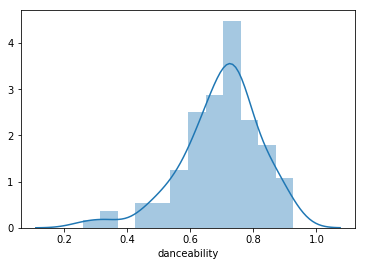

Mean value for energy: 0.6606899999999999


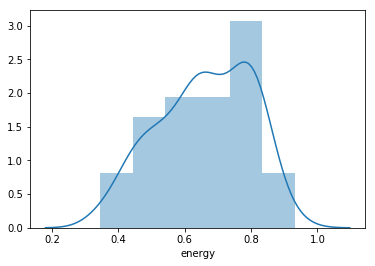

Mean value for mode: 0.58


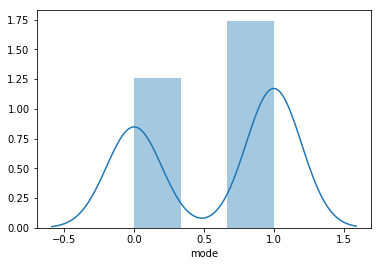

Mean value for speechiness: 0.10396899999999999


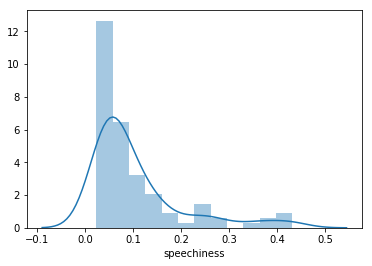

Mean value for acousticness: 0.16630648999999997


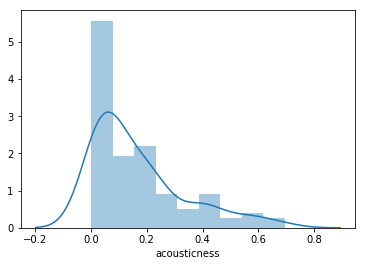

Mean value for instrumentalness: 0.0047961442


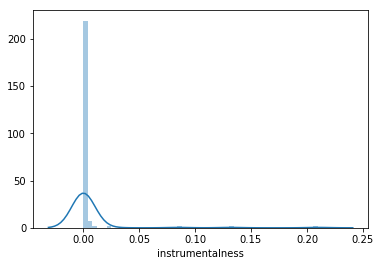

Mean value for liveness: 0.15060700000000002


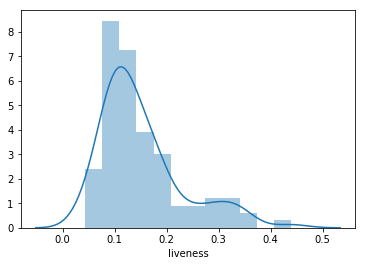

Mean value for valence: 0.5170489999999999


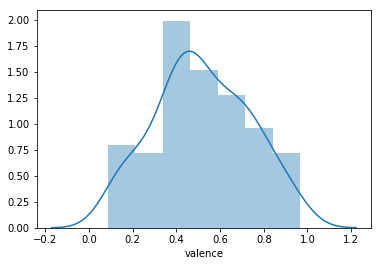

In [14]:
print("Mean value for danceability:", data['danceability'].mean())
sns.distplot(data['danceability'])
plt.show()
print("Mean value for energy:", data['energy'].mean())
sns.distplot(data['energy'])
plt.show()
print("Mean value for mode:", data['mode'].mean())
sns.distplot(data['mode'])
plt.show()
print("Mean value for speechiness:", data['speechiness'].mean())
sns.distplot(data['speechiness'])
plt.show()
print("Mean value for acousticness:", data['acousticness'].mean())
sns.distplot(data['acousticness'])
plt.show()
print("Mean value for instrumentalness:", data['instrumentalness'].mean())
sns.distplot(data['instrumentalness'])
plt.show()
print("Mean value for liveness:", data['liveness'].mean())
sns.distplot(data['liveness'])
plt.show()
print("Mean value for valence:", data['valence'].mean())
sns.distplot(data['valence'])
plt.show()

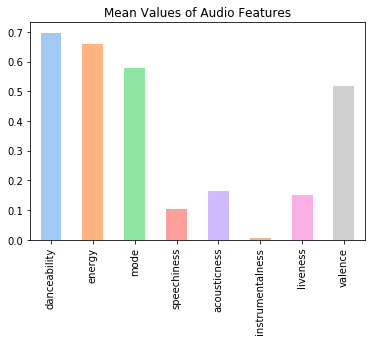

In [15]:
numeric = data.drop(['id','name','artists'], axis=1)
small = numeric.drop(['tempo','duration_ms','key','loudness','time_signature'], axis=1)
sns.set_palette('pastel')
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()